In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [3]:
from utils import data_info


In [193]:
data_path = 'datasets/'

sales = pd.read_csv('datasets/sales_2020-2024_even_cleaner.csv')
sales.head()


,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,api_client_title,shipping_city,market_name,cancelled,financial_status,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,total_sales,discounts,net_quantity,ordered_item_quantity,gross_sales,net_sales,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,is_discounted,latitude,longitude,product_type_adj,frame_color,referring_channel_grouped,discount_per_item
0,2020-03-09,2051807182986,Denver,3071019712650,6306587911,139.0,Jazz Ensemble,Gift Collection,Online Store,Denver,United States,No,paid,Colorado,United States,First-time,2020-03,2020-01,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,9,139.00,0.0,0.00,False,39.739236,-104.984862,Gift Collection,Black,google,0.00
1,2020-03-12,2062875426954,Mineola,6411522516,4612033708170,139.0,Marilyn Monroe,Gift Collection,Online Store,Mineola,United States,No,partially_refunded,New York,United States,Returning,2017-06,2017-04,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,12,139.00,0.0,0.00,False,40.749268,-73.640685,Gift Collection,Black,google,0.00
2,2020-03-12,2062875426954,Mineola,6411522516,4600557273226,139.0,New York Jazz,Gift Collection,Online Store,Mineola,United States,No,partially_refunded,New York,United States,Returning,2017-06,2017-04,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,12,139.00,0.0,0.00,False,40.749268,-73.640685,Gift Collection,Black,google,0.00
3,2020-04-03,2115155034250,Mineola,6411522516,4612062969994,139.0,Seated Nude,Gift Collection,Online Store,Mineola,United States,No,paid,New York,United States,Returning,2017-06,2017-04,NaN,NaN,direct,direct,NaN,NaN,104.25,34.75,1,1,139.0,104.25,1,104.25,2020,4,3,104.25,25.0,0.25,True,40.749268,-73.640685,Gift Collection,Black,direct,34.75
4,2020-04-03,2115155034250,Mineola,6411522516,4605089349770,139.0,Child on Beach,Gift Collection,Online Store,Mineola,United States,No,paid,New York,United States,Returning,2017-06,2017-04,NaN,NaN,direct,direct,NaN,NaN,104.25,34.75,1,1,139.0,104.25,1,104.25,2020,4,3,104.25,25.0,0.25,True,40.749268,-73.640685,Gift Collection,Black,direct,34.75


In [194]:
data_info(sales)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7039 entries, 0 to 7038
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   day                        7039 non-null   object 
 1   order_id                   7039 non-null   int64  
 2   billing_city               7039 non-null   object 
 3   customer_id                7039 non-null   int64  
 4   product_id                 7039 non-null   int64  
 5   product_price              7039 non-null   float64
 6   product_title              7039 non-null   object 
 7   product_type               5945 non-null   object 
 8   api_client_title           7039 non-null   object 
 9   shipping_city              7034 non-null   object 
 10  market_name                7038 non-null   object 
 11  cancelled                  7039 non-null   object 
 12  financial_status           7039 non-null   object 
 13  billing_region             6586 non-null   objec

('Describe numeric:',
            order_id   customer_id    product_id  product_price   total_sales  \
 count  7.039000e+03  7.039000e+03  7.039000e+03    7039.000000   7039.000000   
 mean   4.017598e+12  5.295365e+12  4.464973e+12     131.046690    115.572560   
 std    9.782027e+11  1.306153e+12  2.092109e+12     743.141524    498.105645   
 min    2.051807e+12  4.567022e+09  6.160175e+09      10.000000      0.250000   
 25%    3.056193e+12  4.456442e+12  4.612049e+12      49.000000     49.000000   
 50%    3.810651e+12  5.101201e+12  4.826653e+12      49.000000     53.100000   
 75%    4.661992e+12  5.984997e+12  5.280933e+12     127.000000    114.000000   
 max    5.973919e+12  8.290357e+12  8.630264e+12   22000.000000  18400.000000   
 
          discounts  net_quantity  ordered_item_quantity   gross_sales  \
 count  7039.000000   7039.000000            7039.000000   7039.000000   
 mean     17.870169      1.042762               1.040205    133.278433   
 std     287.424175      

In [195]:
sales[sales.marketing_event_target.notna() | sales.marketing_event_type.notna()].sample(10)



,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,api_client_title,shipping_city,market_name,cancelled,financial_status,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,total_sales,discounts,net_quantity,ordered_item_quantity,gross_sales,net_sales,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,is_discounted,latitude,longitude,product_type_adj,frame_color,referring_channel_grouped,discount_per_item
5218,2022-01-22,4649348759782,Pasadena,6042948600038,4826366673034,55.0,Together,Mini,Online Store,Pasadena,United States,No,paid,California,United States,Returning,2022-01,2022-01,https://loox.io/,loox.io,loox,loox,NaN,message,55.0,0.0,1,1,55.0,55.0,1,55.0,2022,1,22,55.0,0.0,0.0,False,34.147651,-118.144155,Mini,Black,other,0.0
2906,2021-03-26,3710268080283,Jersey City,4558712570011,4816366928010,49.0,Elephant,Mini,Online Store,Jersey City,United States,No,paid,New Jersey,United States,Returning,2021-02,2021-01,https://loox.io/,loox.io,loox,loox,NaN,message,44.1,4.9,1,1,49.0,44.1,1,44.1,2021,3,26,44.1,10.0,0.1,True,40.721568,-74.047455,Mini,Black,other,4.9
1483,2021-01-17,3013748031643,San Diego,4483597172891,5906123686043,49.0,Tree of Purple Hearts,Mini,Online Store,San Diego,United States,No,paid,California,United States,First-time,2021-01,2021-01,https://l.facebook.com,l.facebook.com,facebook,meta,facebook_messenger,message,49.0,0.0,1,1,49.0,49.0,1,49.0,2021,1,17,49.0,0.0,0.0,False,32.717420,-117.162772,Mini,Black,facebook,0.0
3699,2021-05-23,3852042797211,Santa Clara,4483027206299,5280931414171,49.0,Small Things,Mini,Online Store,Santa Clara,United States,No,paid,California,United States,Returning,2021-01,2021-01,https://loox.io/,loox.io,loox,loox,NaN,message,44.1,4.9,1,1,49.0,44.1,1,44.1,2021,5,23,44.1,10.0,0.1,True,37.233325,-121.684635,Mini,Black,other,4.9
3168,2021-04-16,3758793556123,Commerce Township,5159610417307,4600571232394,114.0,Bookville,Gift Collection,Online Store,Commerce Township,United States,No,paid,Michigan,United States,First-time,2021-04,2021-04,https://loox.io,loox.io,loox,loox,NaN,message,102.6,11.4,1,1,114.0,102.6,1,102.6,2021,4,16,102.6,10.0,0.1,True,42.591143,-83.490772,Gift Collection,Black,other,11.4
3263,2021-04-21,3772885860507,Jersey City,4558712570011,5280931414171,49.0,Small Things,Mini,Online Store,Hackensack,United States,No,paid,New Jersey,United States,Returning,2021-02,2021-01,https://loox.io/,loox.io,loox,loox,NaN,message,44.1,4.9,1,1,49.0,44.1,1,44.1,2021,4,21,44.1,10.0,0.1,True,40.721568,-74.047455,Mini,White,other,4.9
3081,2021-04-04,3732150583451,Cambusbarron Stirling,5106627739803,4826366673034,49.0,Jar,Mini,Online Store,Cambusbarron Stirling,International,No,paid,NaN,United Kingdom,Returning,2021-03,2021-01,https://loox.io/p/4J2rXx7r5,loox.io,loox,loox,NaN,message,44.1,4.9,1,1,49.0,44.1,1,44.1,2021,4,4,44.1,10.0,0.1,True,56.109290,-3.967956,Mini,White,other,4.9
3700,2021-05-23,3852042797211,Santa Clara,4483027206299,4826638155914,49.0,Dove,Mini,Online Store,Santa Clara,United States,No,paid,California,United States,Returning,2021-01,2021-01,https://loox.io/,loox.io,loox,loox,NaN,message,44.1,4.9,1,1,49.0,44.1,1,44.1,2021,5,23,44.1,10.0,0.1,True,37.233325,-121.684635,Mini,Black,other,4.9
2856,2021-03-24,3703873437851,Brooksville,5074241093787,6129484398747,139.0,Wildflowers,Gift Collection,Online Store,Brooksville,United States,No,paid,Florida,United States,Returning,2021-03,2021-01,https://loox.io/,loox.io,loox,loox,NaN,message,139.0,0.0,1,1,139.0,139.0,1,139.0,2021,3,24,139.0,0.0,0.0,False,28.555272,-82.387871,Gift Collection,Black,other,0.0
4010,2021-07-17,3980638781595,Omaha,5373188505755,4826652835978,49.0,Whale,Mini,Online Store,Omaha,United States,No,paid,Nebraska,United States,Returning,2021-07,2021-07,https://loox.io/,loox.io,l

### RFM Simple Version

In [196]:
import datetime as dt

sales['day'] = pd.to_datetime(sales['day'], errors='coerce')

sales.dropna(subset=['day'], inplace=True)

reference_date = sales['day'].max()

rfm = sales.groupby('customer_id').agg({
    'day': lambda x: (reference_date - x.max()).days,
    'order_id': 'nunique',
    'product_price': 'sum'
}).rename(columns={'day': 'recency', 'order_id': 'frequency', 'product_price': 'monetary'})

rfm.head()


,recency,frequency,monetary
customer_id,,,
4567021831,18,1,289.0
6239237578,1063,1,1007.0
6411522516,760,6,1024.2
6421963796,1608,3,417.0
6527939348,1478,1,139.0


In [197]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the RFM features
rfm_scaled = scaler.fit_transform(rfm)

# Convert the scaled data back to a DataFrame for easy handling
rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm.index, columns=rfm.columns)

# Display the scaled RFM data to review
rfm_scaled_df.head()


,recency,frequency,monetary
customer_id,,,
4567021831,-2.293918,-0.365657,0.022827
6239237578,0.092435,-0.365657,0.430904
6411522516,-0.599493,4.545541,0.440679
6421963796,1.336993,1.598822,0.095576
6527939348,1.040126,-0.365657,-0.062426


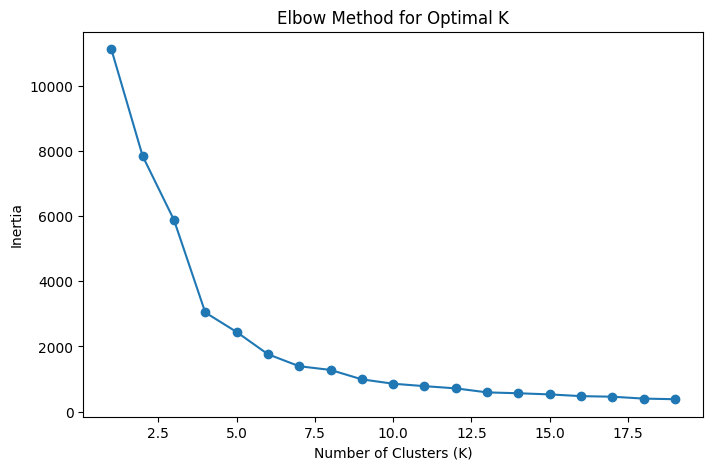

In [198]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate the inertia for a range of cluster numbers to find the optimal K
inertia = []
K_range = range(1, 20)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_df)
    inertia.append(kmeans.inertia_)

# Plotting the inertia to observe the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [199]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Given optimal number of clusters is 4, perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_scaled_df['cluster'] = kmeans.fit_predict(rfm_scaled_df)

# Using t-SNE for dimensionality reduction to visualize clusters
tsne = TSNE(n_components=2, random_state=42)
rfm_tsne = tsne.fit_transform(rfm_scaled_df.drop(columns='cluster'))

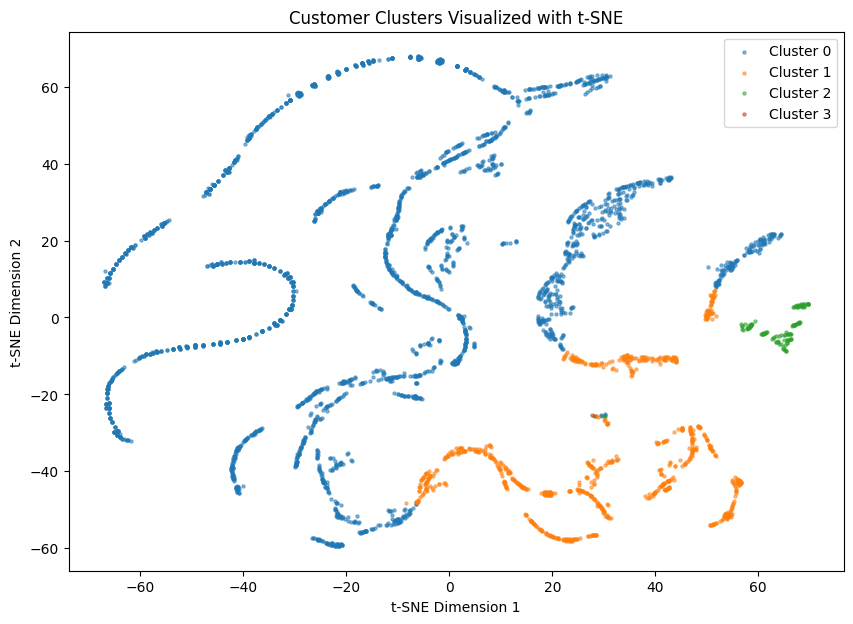

In [200]:

# Plotting the clusters using the t-SNE transformed data
plt.figure(figsize=(10, 7))
for cluster in range(4):
    plt.scatter(rfm_tsne[rfm_scaled_df['cluster'] == cluster, 0],
                rfm_tsne[rfm_scaled_df['cluster'] == cluster, 1],
                label=f'Cluster {cluster}', s=5, alpha=0.5)

plt.title('Customer Clusters Visualized with t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()


In [201]:
rfm_scaled_df

,recency,frequency,monetary,cluster
customer_id,,,,
4567021831,-2.293918,-0.365657,0.022827,1
6239237578,0.092435,-0.365657,0.430904,0
6411522516,-0.599493,4.545541,0.440679,2
6421963796,1.336993,1.598822,0.095576,0
6527939348,1.040126,-0.365657,-0.062426,0
...,...,...,...,...
8286235001062,-2.325888,-0.365657,-0.034008,1
8287046435046,-2.325888,-0.365657,-0.034008,1
8288450576614,-2.328172,-0.365657,-0.096527,1


In [202]:
# Scale back the features to original values (excluding the cluster column)
rfm_original = pd.DataFrame(
    scaler.inverse_transform(rfm_scaled_df.drop(columns='cluster')),
    index=rfm_scaled_df.index,
    columns=['recency', 'frequency', 'monetary']
)

# Add the cluster column back
rfm_original['cluster'] = rfm_scaled_df['cluster']

# Display the results
print("\nOriginal RFM values with clusters:")
print(rfm_original.head())

# Optional: Get cluster statistics
print("\nCluster Statistics:")
print(rfm_original.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}).round(2))


Original RFM values with clusters:
             recency  frequency  monetary  cluster
customer_id                                       
4567021831      18.0        1.0     289.0        1
6239237578    1063.0        1.0    1007.0        0
6411522516     760.0        6.0    1024.2        2
6421963796    1608.0        3.0     417.0        0
6527939348    1478.0        1.0     139.0        0

Cluster Statistics:
         recency  frequency  monetary
cluster                              
0        1251.72       1.23    150.30
1         295.50       1.28    353.64
2         773.24       5.51   1064.75
3         303.00      17.00  93130.40


### Merge RFM with sales df

In [203]:
sales = sales.merge(rfm_original, left_on='customer_id', right_index=True, how='left')

sales.head()



,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,api_client_title,shipping_city,market_name,cancelled,financial_status,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,total_sales,discounts,net_quantity,ordered_item_quantity,gross_sales,net_sales,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,is_discounted,latitude,longitude,product_type_adj,frame_color,referring_channel_grouped,discount_per_item,recency,frequency,monetary,cluster
0,2020-03-09,2051807182986,Denver,3071019712650,6306587911,139.0,Jazz Ensemble,Gift Collection,Online Store,Denver,United States,No,paid,Colorado,United States,First-time,2020-03,2020-01,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,9,139.00,0.0,0.00,False,39.739236,-104.984862,Gift Collection,Black,google,0.00,1662.0,1.0,139.0,0
1,2020-03-12,2062875426954,Mineola,6411522516,4612033708170,139.0,Marilyn Monroe,Gift Collection,Online Store,Mineola,United States,No,partially_refunded,New York,United States,Returning,2017-06,2017-04,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,12,139.00,0.0,0.00,False,40.749268,-73.640685,Gift Collection,Black,google,0.00,760.0,6.0,1024.2,2
2,2020-03-12,2062875426954,Mineola,6411522516,4600557273226,139.0,New York Jazz,Gift Collection,Online Store,Mineola,United States,No,partially_refunded,New York,United States,Returning,2017-06,2017-04,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,12,139.00,0.0,0.00,False,40.749268,-73.640685,Gift Collection,Black,google,0.00,760.0,6.0,1024.2,2
3,2020-04-03,2115155034250,Mineola,6411522516,4612062969994,139.0,Seated Nude,Gift Collection,Online Store,Mineola,United States,No,paid,New York,United States,Returning,2017-06,2017-04,NaN,NaN,direct,direct,NaN,NaN,104.25,34.75,1,1,139.0,104.25,1,104.25,2020,4,3,104.25,25.0,0.25,True,40.749268,-73.640685,Gift Collection,Black,direct,34.75,760.0,6.0,1024.2,2
4,2020-04-03,2115155034250,Mineola,6411522516,4605089349770,139.0,Child on Beach,Gift Collection,Online Store,Mineola,United States,No,paid,New York,United States,Returning,2017-06,2017-04,NaN,NaN,direct,direct,NaN,NaN,104.25,34.75,1,1,139.0,104.25,1,104.25,2020,4,3,104.25,25.0,0.25,True,40.749268,-73.640685,Gift Collection,Black,direct,34.75,760.0,6.0,1024.2,2


In [484]:
# Group sales by day and cluster, calculate daily total sales

filter_date = '2018-03-01'
daily_sales_by_cluster = sales[sales.day >= filter_date].groupby(['day', 'cluster'])['net_sales'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))

# Plot each cluster
for cluster in daily_sales_by_cluster.cluster.unique():
    cluster_data = daily_sales_by_cluster[daily_sales_by_cluster.cluster == cluster]
    plt.plot(cluster_data.day, cluster_data.net_sales, label=f'Cluster {cluster}')

plt.title('Daily Sales by Customer Cluster')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

KeyError: 'cluster'

In [208]:
sales[sales.cluster == 3].head()


,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,api_client_title,shipping_city,market_name,cancelled,financial_status,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,total_sales,discounts,net_quantity,ordered_item_quantity,gross_sales,net_sales,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,is_discounted,latitude,longitude,product_type_adj,frame_color,referring_channel_grouped,discount_per_item,recency,frequency,monetary,cluster
4457,2021-11-03,4542097326310,Rensselaer,5918842519782,4806031704202,49.00,Soar!,Mini,Online Store,Rensselaer,United States,No,paid,New York,United States,First-time,2021-11,2021-10,http://m.facebook.com,m.facebook.com,facebook,meta,NaN,NaN,49.00,0.0,1,1,49.00,49.00,1,49.00,2021,11,3,49.00,0.0,0.0,False,42.709139,-73.510773,Mini,Black,facebook,0.0,303.0,17.0,93130.4,3
4458,2021-11-03,4542097326310,Rensselaer,5918842519782,4816345923722,49.00,Cat,Mini,Online Store,Rensselaer,United States,No,paid,New York,United States,First-time,2021-11,2021-10,http://m.facebook.com,m.facebook.com,facebook,meta,NaN,NaN,49.00,0.0,1,1,49.00,49.00,1,49.00,2021,11,3,49.00,0.0,0.0,False,42.709139,-73.510773,Mini,Black,facebook,0.0,303.0,17.0,93130.4,3
4467,2021-11-03,4542097326310,Rensselaer,5918842519782,5480589525147,49.00,Sweet Year,Mini,Online Store,Rensselaer,United States,No,paid,New York,United States,First-time,2021-11,2021-10,http://m.facebook.com,m.facebook.com,facebook,meta,NaN,NaN,49.00,0.0,1,1,49.00,49.00,1,49.00,2021,11,3,49.00,0.0,0.0,False,42.709139,-73.510773,Mini,Black,facebook,0.0,303.0,17.0,93130.4,3
4541,2021-11-12,4569127649510,Rensselaer,5918842519782,6756399579291,104.25,Seaside Serenade,Gift Collection,Online Store,Rensselaer,United States,No,paid,New York,United States,Returning,2021-11,2021-10,NaN,NaN,smartrmail,smartrmail,NaN,NaN,104.25,0.0,1,1,104.25,104.25,1,104.25,2021,11,12,104.25,0.0,0.0,False,42.709139,-73.510773,Gift Collection,Black,smartrmail,0.0,303.0,17.0,93130.4,3
4551,2021-11-12,4569127649510,Rensselaer,5918842519782,4600557273226,104.25,NY Jazz,Gift Collection,Online Store,Rensselaer,United States,No,paid,New York,United States,Returning,2021-11,2021-10,NaN,NaN,smartrmail,smartrmail,NaN,NaN,104.25,0.0,1,1,104.25,104.25,1,104.25,2021,11,12,104.25,0.0,0.0,False,42.709139,-73.510773,Gift Collection,Black,smartrmail,0.0,303.0,17.0,93130.4,3


### RFM with additional features



In [394]:
sales = pd.read_csv(os.path.join(data_path, 'sales_2020-2024_even_cleaner.csv'))

In [395]:
sales = sales[sales.customer_id != 5918842519782]

In [396]:
sales.head()

,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,api_client_title,shipping_city,market_name,cancelled,financial_status,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,total_sales,discounts,net_quantity,ordered_item_quantity,gross_sales,net_sales,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,is_discounted,latitude,longitude,product_type_adj,frame_color,referring_channel_grouped,discount_per_item
0,2020-03-09,2051807182986,Denver,3071019712650,6306587911,139.0,Jazz Ensemble,Gift Collection,Online Store,Denver,United States,No,paid,Colorado,United States,First-time,2020-03,2020-01,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,9,139.00,0.0,0.00,False,39.739236,-104.984862,Gift Collection,Black,google,0.00
1,2020-03-12,2062875426954,Mineola,6411522516,4612033708170,139.0,Marilyn Monroe,Gift Collection,Online Store,Mineola,United States,No,partially_refunded,New York,United States,Returning,2017-06,2017-04,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,12,139.00,0.0,0.00,False,40.749268,-73.640685,Gift Collection,Black,google,0.00
2,2020-03-12,2062875426954,Mineola,6411522516,4600557273226,139.0,New York Jazz,Gift Collection,Online Store,Mineola,United States,No,partially_refunded,New York,United States,Returning,2017-06,2017-04,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,12,139.00,0.0,0.00,False,40.749268,-73.640685,Gift Collection,Black,google,0.00
3,2020-04-03,2115155034250,Mineola,6411522516,4612062969994,139.0,Seated Nude,Gift Collection,Online Store,Mineola,United States,No,paid,New York,United States,Returning,2017-06,2017-04,NaN,NaN,direct,direct,NaN,NaN,104.25,34.75,1,1,139.0,104.25,1,104.25,2020,4,3,104.25,25.0,0.25,True,40.749268,-73.640685,Gift Collection,Black,direct,34.75
4,2020-04-03,2115155034250,Mineola,6411522516,4605089349770,139.0,Child on Beach,Gift Collection,Online Store,Mineola,United States,No,paid,New York,United States,Returning,2017-06,2017-04,NaN,NaN,direct,direct,NaN,NaN,104.25,34.75,1,1,139.0,104.25,1,104.25,2020,4,3,104.25,25.0,0.25,True,40.749268,-73.640685,Gift Collection,Black,direct,34.75


In [397]:
sales[sales.net_quantity > 1].shape

(202, 45)

In [398]:
import datetime as dt

sales['day'] = pd.to_datetime(sales['day'], errors='coerce')

sales.dropna(subset=['day'], inplace=True)

reference_date = sales['day'].max()

rfm_af = sales.groupby('customer_id').agg({
    # 'day': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'nunique',                             # Frequency
    'net_sales': 'sum',                             # Monetary
    'net_quantity': 'sum',
    'discounts': 'sum'
}).rename(columns={
    # 'day': 'recency', 
    'order_id': 'frequency', 
    'net_sales': 'monetary', 
    'net_quantity': 'quantity', 
    'discounts': 'discount_total'
})


In [399]:
# # Create category-based count features
# category_columns = ['market_name', 'customer_type', 'month', 'is_discounted', 'product_type_adj', 'frame_color', 'referring_channel_grouped']

# for col in category_columns:
#     # Create columns based on each unique category value in `col`
#     category_counts = sales.groupby(['customer_id', col]).net_quantity.sum().unstack(fill_value=0)
#     category_counts.columns = [f"{col}_{value}_count" for value in category_counts.columns]
#     # Merge with RFM dataset
#     rfm_af = rfm_af.join(category_counts, on='customer_id', how='left')

# # Fill any NaNs that result from customers with no purchases in some categories with 0
# rfm_af.fillna(0, inplace=True)

# rfm_af.head()  


In [400]:
# Create category-based rate features
category_columns = ['market_name', 'month', 'is_discounted', 'product_type_adj', 'frame_color', 'referring_channel_grouped']

for col in category_columns:
    # Create columns based on each unique category value in `col`
    category_counts = sales.groupby(['customer_id', col]).net_quantity.sum().unstack(fill_value=0)
    category_counts.columns = [f"{col}_{value}_rate" for value in category_counts.columns]
    
    # Calculate rates by dividing by total quantity for each customer
    for column in category_counts.columns:
        category_counts[column] = category_counts[column] / rfm_af['quantity']
    
    # Merge with RFM dataset
    rfm_af = rfm_af.join(category_counts, on='customer_id', how='left')

# Fill any NaNs that result from customers with no purchases in some categories with 0
rfm_af.fillna(0, inplace=True)

rfm_af.head()

,frequency,monetary,quantity,discount_total,market_name_International_rate,market_name_United States_rate,month_1_rate,month_2_rate,month_3_rate,month_4_rate,month_5_rate,month_6_rate,month_7_rate,month_8_rate,month_9_rate,month_10_rate,month_11_rate,month_12_rate,is_discounted_False_rate,is_discounted_True_rate,product_type_adj_Book Prints_rate,product_type_adj_Classique_rate,product_type_adj_Favorite Larger_rate,product_type_adj_Gift Collection_rate,product_type_adj_Gift Collection Large_rate,product_type_adj_Grand_rate,product_type_adj_Handwritten_rate,product_type_adj_Mini_rate,product_type_adj_Series_rate,frame_color_Black_rate,frame_color_Cream_rate,frame_color_White_rate,frame_color_Wood_rate,referring_channel_grouped_direct_rate,referring_channel_grouped_facebook_rate,referring_channel_grouped_google_rate,referring_channel_grouped_instagram_rate,referring_channel_grouped_other_rate,referring_channel_grouped_smartrmail_rate
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4567021831,1,289.00,1,0.00,0.0,1.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.00,1.000,0.0,0.0,0.000,1.000000,0.000000,0.0,1.00,0.0,0.000,0.0,0.0,0.0,0.000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,1.000
6239237578,1,1007.00,4,0.00,0.0,1.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.00,0.000,1.0,0.0,0.000,1.000000,0.000000,0.0,0.25,0.0,0.750,0.0,0.0,0.0,0.000,0.0,1.000000,0.0,0.000000,0.0,1.0,0.0,0.000,0.0,0.0,0.000
6411522516,6,877.70,8,146.50,0.0,1.0,0.0,0.0,0.25,0.250000,0.000000,0.0,0.0,0.25,0.125,0.0,0.0,0.125,0.500000,0.500000,0.0,0.00,0.0,0.875,0.0,0.0,0.0,0.125,0.0,1.000000,0.0,0.000000,0.0,0.5,0.0,0.375,0.0,0.0,0.125
6421963796,3,382.25,3,34.75,0.0,1.0,0.0,0.0,0.00,0.333333,0.666667,0.0,0.0,0.00,0.000,0.0,0.0,0.000,0.666667,0.333333,0.0,0.00,0.0,1.000,0.0,0.0,0.0,0.000,0.0,0.666667,0.0,0.333333,0.0,1.0,0.0,0.000,0.0,0.0,0.000
6527939348,1,139.00,1,0.00,0.0,1.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.00,1.000,0.0,0.0,0.000,1.000000,0.000000,0.0,0.00,0.0,1.000,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,1.000000,0.0,1.0,0.0,0.000,0.0,0.0,0.000


In [401]:
rfm_af['is_returning'] = (rfm_af['frequency'] > 1).astype(int)


In [402]:
# Additional price-related features
avg_cols = ['discount_percentage', 'net_quantity', 'unit_price', 'longitude', 'latitude', 'discount_per_item']
price_stats = sales.groupby('customer_id')[avg_cols].mean()
rfm_af = rfm_af.join(price_stats, on='customer_id')


In [403]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fill NA values in original dataframe
numeric_cols = rfm_af.select_dtypes(include=['float64', 'int64']).columns
rfm_af[numeric_cols] = rfm_af[numeric_cols].fillna(rfm_af[numeric_cols].median())

# Scale the data after filling NAs
rfm_af_scaled = scaler.fit_transform(rfm_af)
rfm_af_scaled_df = pd.DataFrame(rfm_af_scaled, index=rfm_af.index, columns=rfm_af.columns)

rfm_af_scaled_df.head()


,frequency,monetary,quantity,discount_total,market_name_International_rate,market_name_United States_rate,month_1_rate,month_2_rate,month_3_rate,month_4_rate,month_5_rate,month_6_rate,month_7_rate,month_8_rate,month_9_rate,month_10_rate,month_11_rate,month_12_rate,is_discounted_False_rate,is_discounted_True_rate,product_type_adj_Book Prints_rate,product_type_adj_Classique_rate,product_type_adj_Favorite Larger_rate,product_type_adj_Gift Collection_rate,product_type_adj_Gift Collection Large_rate,product_type_adj_Grand_rate,product_type_adj_Handwritten_rate,product_type_adj_Mini_rate,product_type_adj_Series_rate,frame_color_Black_rate,frame_color_Cream_rate,frame_color_White_rate,frame_color_Wood_rate,referring_channel_grouped_direct_rate,referring_channel_grouped_facebook_rate,referring_channel_grouped_google_rate,referring_channel_grouped_instagram_rate,referring_channel_grouped_other_rate,referring_channel_grouped_smartrmail_rate,is_returning,discount_percentage,net_quantity,unit_price,longitude,latitude,discount_per_item
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4567021831,-0.373536,0.141245,-0.488962,-0.081893,-0.428688,0.428735,-0.392857,-0.381476,-0.385407,-0.318122,-0.320174,-0.242543,-0.210463,-0.18474,4.951003,-0.213819,-0.387929,-0.439260,0.562665,-0.562665,-0.110336,11.419382,-0.064718,-0.759780,-0.06099,-0.029364,-0.228983,-1.399664,-0.078269,0.660722,-0.238212,-0.323718,-0.377169,-0.669623,-0.771589,-0.430446,-0.320273,-0.253646,4.284061,-0.527610,-0.457078,-0.154765,0.447067,1.419706,1.105130,-0.062331
6239237578,-0.373536,1.299974,1.029976,-0.081893,-0.428688,0.428735,-0.392857,-0.381476,-0.385407,-0.318122,-0.320174,-0.242543,-0.210463,-0.18474,-0.224706,5.239502,-0.387929,-0.439260,0.562665,-0.562665,-0.110336,2.778799,-0.064718,0.974645,-0.06099,-0.029364,-0.228983,-1.399664,-0.078269,0.660722,-0.238212,-0.323718,-0.377169,1.652065,-0.771589,-0.430446,-0.320273,-0.253646,-0.319513,-0.527610,-0.457078,-0.154765,0.354467,-0.374671,0.375211,-0.062331
6411522516,4.700967,1.091306,3.055228,0.370238,-0.428688,0.428735,-0.392857,-0.381476,0.415271,0.657697,-0.320174,-0.242543,-0.210463,1.33520,0.422257,-0.213819,-0.387929,-0.075033,-0.724761,0.724761,-0.110336,-0.101396,-0.064718,1.263716,-0.06099,-0.029364,-0.228983,-1.115649,-0.078269,0.660722,-0.238212,-0.323718,-0.377169,0.491221,-0.771589,0.680000,-0.320273,-0.253646,0.255934,1.895341,1.129575,-0.154765,0.001376,-0.060627,0.171707,0.010124
6421963796,1.656265,0.291735,0.523664,0.025353,-0.428688,0.428735,-0.392857,-0.381476,-0.385407,0.982970,2.182667,-0.242543,-0.210463,-0.18474,-0.224706,-0.213819,-0.387929,-0.439260,-0.295619,0.295619,-0.110336,-0.101396,-0.064718,1.552787,-0.06099,-0.029364,-0.228983,-1.399664,-0.078269,-0.146749,-0.238212,0.944973,-0.377169,1.652065,-0.771589,-0.430446,-0.320273,-0.253646,-0.319513,1.895341,0.600691,-0.154765,0.045386,-0.219392,-0.799383,-0.016500
6527939348,-0.373536,-0.100829,-0.488962,-0.081893,-0.428688,0.428735,-0.392857,-0.381476,-0.385407,-0.318122,-0.320174,-0.242543,-0.210463,-0.18474,4.951003,-0.213819,-0.387929,-0.439260,0.562665,-0.562665,-0.110336,-0.101396,-0.064718,1.552787,-0.06099,-0.029364,-0.228983,-1.399664,-0.078269,-1.761691,-0.238212,3.482354,-0.377169,1.652065,-0.771589,-0.430446,-0.320273,-0.253646,-0.319513,-0.527610,-0.457078,-0.154765,0.074181,-0.927240,-0.537931,-0.062331


In [404]:
rfm_af_scaled_df.isna().sum()


frequency                                      0
monetary                                       0
quantity                                       0
discount_total                                 0
market_name_International_rate                 0
market_name_United States_rate                 0
month_1_rate                                   0
month_2_rate                                   0
month_3_rate                                   0
month_4_rate                                   0
month_5_rate                                   0
month_6_rate                                   0
month_7_rate                                   0
month_8_rate                                   0
month_9_rate                                   0
month_10_rate                                  0
month_11_rate                                  0
month_12_rate                                  0
is_discounted_False_rate                       0
is_discounted_True_rate                        0
product_type_adj_Boo

In [405]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Calculate t-SNE for the data (excluding cluster columns)
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(rfm_af_scaled_df)
# Plot single k-means clustering result with k=5

### Clusters Viz

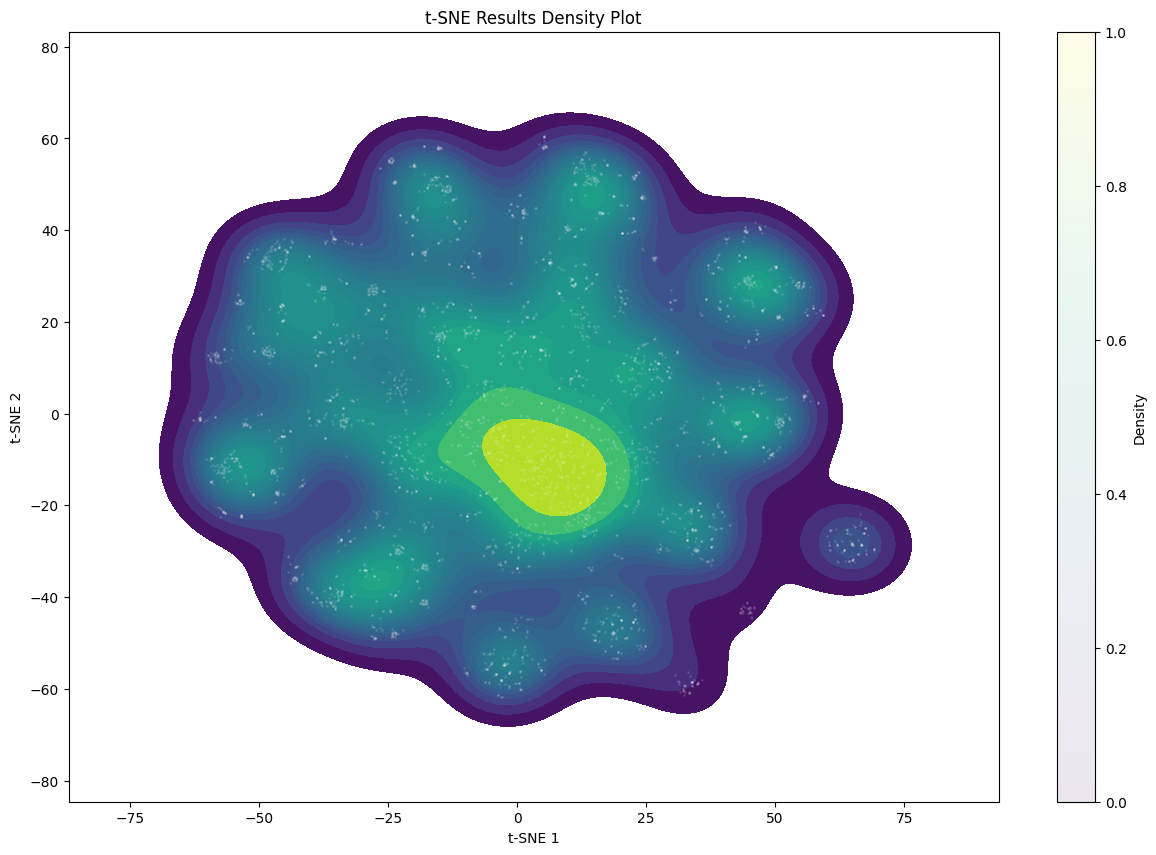

In [486]:
# Create the density plot
plt.figure(figsize=(15, 10))

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame({
    'tsne_1': tsne_results[:, 0],
    'tsne_2': tsne_results[:, 1]
})

# Plot overall density
sns.kdeplot(
    data=tsne_df,
    x='tsne_1',
    y='tsne_2',
    fill=True,
    cmap='viridis',
    levels=20,
)

# Optional: Add scatter points underneath
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=1, alpha=0.1, c='white')

plt.title('t-SNE Results Density Plot')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Density')
plt.show()

In [407]:
import plotly.express as px
import plotly.graph_objects as go

def plot_3d_clusters(tsne_df_3d, clusters_df, cluster_col_prefix='cluster_', k_clusters=4, colors=None, title='3D t-SNE Visualization'):
    """
    Create an interactive 3D scatter plot of clustered data using Plotly.
    
    Parameters:
    -----------
    tsne_df_3d : pandas.DataFrame
        DataFrame containing t-SNE coordinates with columns ['tsne_1', 'tsne_2', 'tsne_3']
    clusters_df : pandas.DataFrame
        DataFrame containing cluster assignments
    cluster_column : str
        Name of the column in clusters_df containing cluster assignments
    k_clusters : int, default=4
        Number of clusters to visualize
    colors : list, default=None
        List of colors for each cluster. If None, defaults to ['blue', 'red', 'green', 'purple']
    title : str, default='3D t-SNE Visualization'
        Title for the plot
        
    Returns:
    --------
    plotly.graph_objects.Figure
        Interactive 3D scatter plot
    """
    
    # Default colors if none provided
    if colors is None:
        colors = px.colors.qualitative.Set1  # Bold and distinct colors
        # colors = px.colors.qualitative.Alphabet # Good for many categories


    cluster_col = f'{cluster_col_prefix}{k_clusters}'
    
    # Create separate traces for each cluster
    traces = []
    for i, cluster in enumerate(clusters_df[cluster_col].unique()):
        mask = (clusters_df[cluster_col] == cluster).values
        tsne_df_3d_masked = tsne_df_3d[mask]
        
        traces.append(
            go.Scatter3d(
                x=tsne_df_3d_masked['tsne_1'],
                y=tsne_df_3d_masked['tsne_2'], 
                z=tsne_df_3d_masked['tsne_3'],
                mode='markers',
                name=f'Cluster {cluster}',
                marker=dict(
                    size=5,
                    opacity=0.5,
                    color=colors[(i+1)%len(colors)]
                )
            )
        )

    # Create and configure the figure
    fig = go.Figure(data=traces)
    
    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title='t-SNE 1',
            yaxis_title='t-SNE 2',
            zaxis_title='t-SNE 3'
        ),
        width=900,
        height=700,
        showlegend=True,
        legend=dict(
            title='Clusters',
            yanchor="top",
            y=0.99,
            xanchor="right",
            x=0.99
        )
    )
    
    return fig

In [408]:
def plot_tsne_clusters(tsne_results, clusters_df, k_clusters, cluster_col_prefix='cluster_', 
                      figsize=(10, 7), point_size=5, alpha=0.5):
    """
    Plot t-SNE results colored by cluster assignments.
    
    Parameters:
    -----------
    tsne_results : numpy.ndarray
        2D array of t-SNE coordinates with shape (n_samples, 2)
    clusters_df : pandas.DataFrame
        DataFrame containing cluster assignments
    k : int
        Number of clusters to visualize
    cluster_col_prefix : str, default='cluster_'
        Prefix used in clusters_df column names
    figsize : tuple, default=(10, 7)
        Figure size as (width, height)
    point_size : int, default=5
        Size of scatter plot points
    alpha : float, default=0.5
        Transparency of points (0 to 1)
    
    Returns:
    --------
    matplotlib.figure.Figure
        The created figure
    """
    
    # Create figure
    fig = plt.figure(figsize=figsize)
    
    cluster_col = f'{cluster_col_prefix}{k_clusters}'
    
    # Plot points colored by cluster
    for i, cluster in enumerate(clusters_df[cluster_col].unique()):
        mask = clusters_df[cluster_col] == cluster
        plt.scatter(tsne_results[mask, 0], 
                   tsne_results[mask, 1],
                   label=f'Cluster {cluster}',
                   s=point_size, 
                   alpha=alpha)  # Cycle through colors if k > len(colors)
    
    plt.title(f'K={k_clusters} Clusters')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.legend(markerscale=2)
    
    return fig


### K-Means Clustering

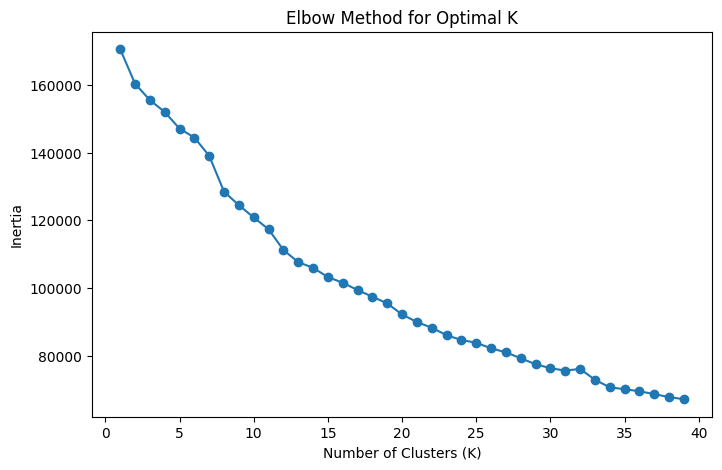

In [409]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate the inertia for a range of cluster numbers to find the optimal K
k_max = 40
inertia = []
K_range = range(1, k_max)
clusters_df = pd.DataFrame(index=rfm_af_scaled_df.index)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters_df[f'cluster_{k}'] = kmeans.fit_predict(rfm_af_scaled_df.drop(columns=[col for col in rfm_af_scaled_df.columns if 'cluster' in col]))
    inertia.append(kmeans.inertia_)

# Plotting the inertia to observe the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


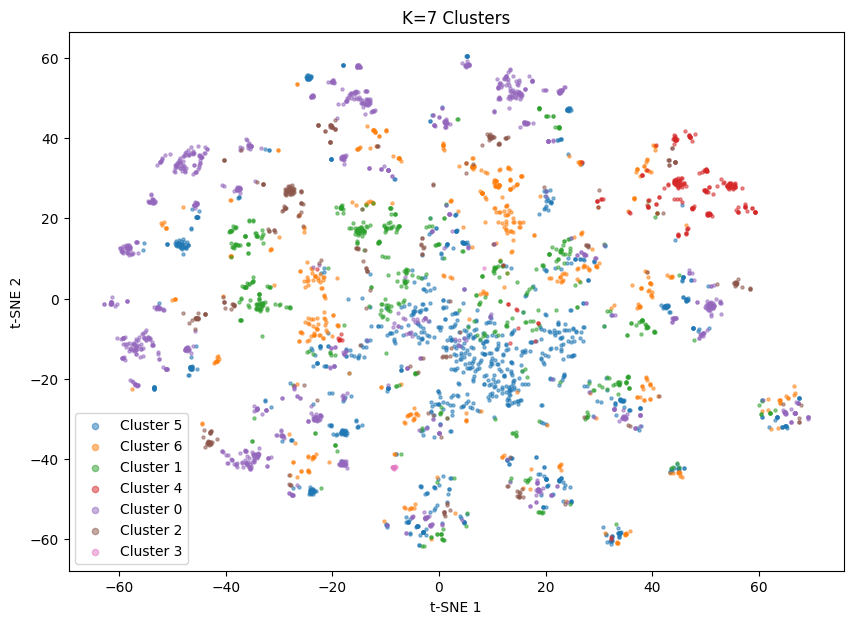

In [410]:

k = 7

# Example usage:
fig = plot_tsne_clusters(tsne_results, clusters_df, k_clusters=k)

In [411]:
from sklearn.manifold import TSNE
import plotly.express as px
import plotly.graph_objects as go

# Calculate t-SNE with 3 components
tsne_3d = TSNE(n_components=3, random_state=42)
tsne_results_3d = tsne_3d.fit_transform(rfm_af_scaled_df)


In [412]:
# Create a DataFrame with t-SNE results
tsne_df_3d = pd.DataFrame({
    'tsne_1': tsne_results_3d[:, 0],
    'tsne_2': tsne_results_3d[:, 1],
    'tsne_3': tsne_results_3d[:, 2]
})


In [413]:
plot_3d_clusters(tsne_df_3d, clusters_df, k_clusters=4, colors=None, title='3D t-SNE Visualization')

In [414]:


# Create interactive 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=tsne_df_3d['tsne_1'],
    y=tsne_df_3d['tsne_2'],
    z=tsne_df_3d['tsne_3'],
    mode='markers',
    marker=dict(
        size=3,
        opacity=0.5,
        # color=tsne_df_3d['tsne_3'],  # Color by the third component
         color=clusters_df['cluster_15'],  # Color by cluster
        colorscale='Viridis',
    )
)])

# Update layout
fig.update_layout(
    title='3D t-SNE Visualization',
    scene=dict(
        xaxis_title='t-SNE 1',
        yaxis_title='t-SNE 2',
        zaxis_title='t-SNE 3'
    ),
    width=900,
    height=700,
)

fig.show()

In [415]:
# Cluster on the t-SNE output
kmeans_tsne = KMeans(n_clusters=4, random_state=42)
clusters = kmeans_tsne.fit_predict(tsne_results_3d)

### T-SNE Clustering

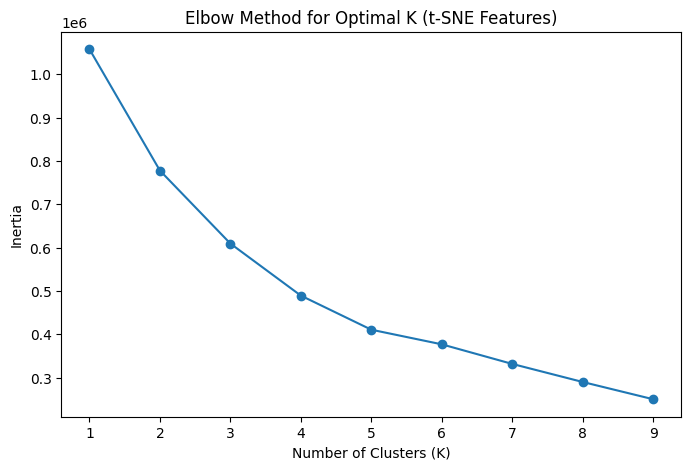

In [416]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate the inertia for a range of cluster numbers to find the optimal K
k_max = 10
inertia = []
K_range = range(1, k_max)


for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters_df[f'tsne_cluster_{k}'] = kmeans.fit_predict(tsne_results_3d)
    inertia.append(kmeans.inertia_)

# Plotting the inertia to observe the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K (t-SNE Features)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [417]:
plot_3d_clusters(tsne_df_3d, clusters_df, cluster_col_prefix='tsne_cluster_',  k_clusters=5, colors=None, title='3D t-SNE Visualization')



### PCA Clustering

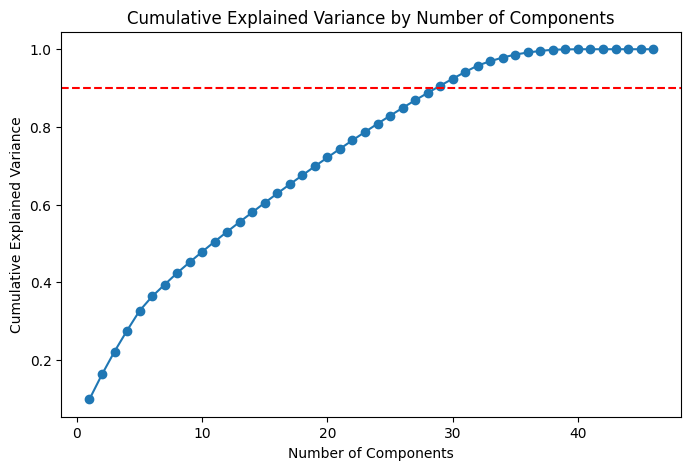

Optimal number of components for 90% explained variance: 29


In [418]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming `data_scaled` is your standardized data matrix
pca = PCA()
pca.fit(rfm_af_scaled_df)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.axhline(y=0.9, color='r', linestyle='--')  # Example threshold at 90%
plt.show()

# Print the number of components for 90% variance
optimal_components = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Optimal number of components for 90% explained variance: {optimal_components}")


In [419]:
# Import libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler  
import matplotlib.pyplot as plt


# Step 2: Apply PCA
# Define the number of components you want to reduce to. Let's start with 2 components for visualization
# n_components = optimal_components
n_components = 5

pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(rfm_af_scaled_df)

# Step 3: Create a DataFrame with the PCA results
# Convert the reduced data into a DataFrame for easier plotting and analysis
pca_df = pd.DataFrame(data_pca, columns=[f'PCA{i+1}' for i in range(n_components)])

# Step 5: (Optional) Explained Variance
# Check the explained variance to understand how much information is retained in the 2 components
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Component: {explained_variance}")
print(f"Total Explained Variance: {explained_variance.sum()}")


Explained Variance by Component: [0.09909609 0.06382722 0.05896395 0.05385191 0.05095706]
Total Explained Variance: 0.3266962316411941


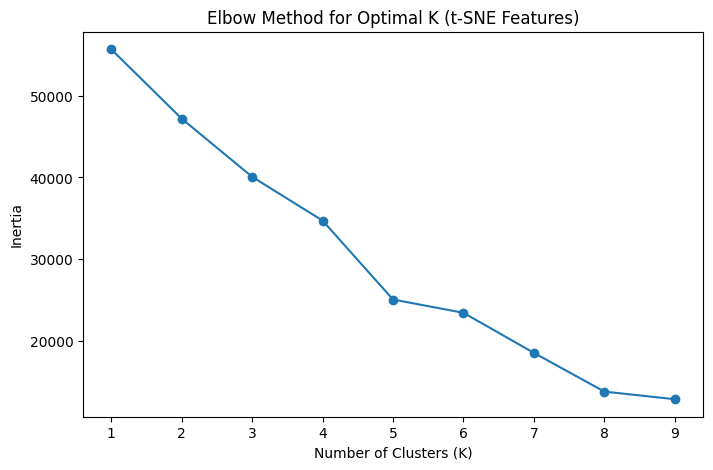

In [420]:
# Calculate the inertia for a range of cluster numbers to find the optimal K
k_max = 10
inertia = []
K_range = range(1, k_max)


for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters_df[f'pca_cluster_{k}'] = kmeans.fit_predict(pca_df)
    inertia.append(kmeans.inertia_)

# Plotting the inertia to observe the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K (t-SNE Features)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [421]:
k_clusters = 5

plot_3d_clusters(tsne_df_3d, clusters_df, cluster_col_prefix='pca_cluster_', k_clusters=k_clusters, colors=None, title='3D t-SNE Visualization')


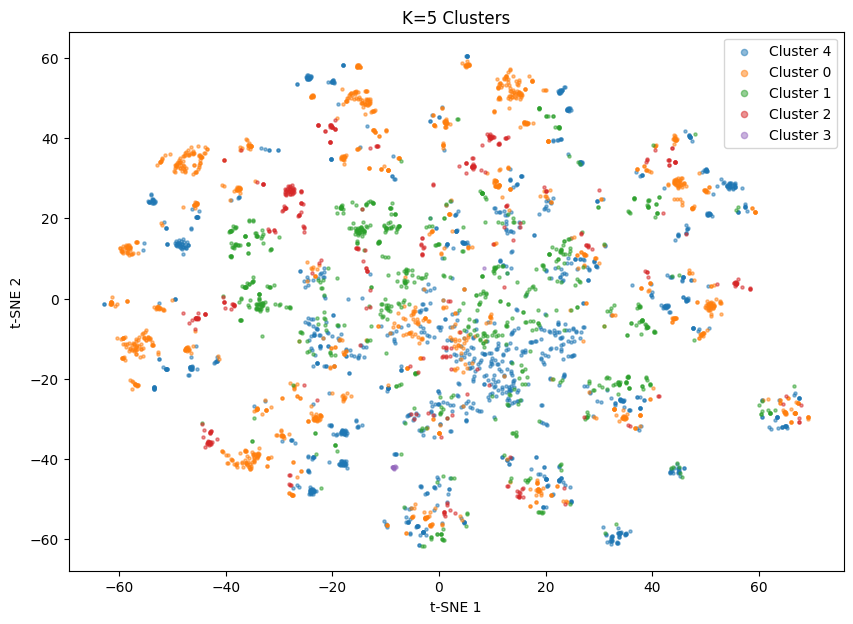

In [422]:
k_clusters = 5

fig = plot_tsne_clusters(tsne_results, clusters_df, k_clusters=k_clusters)

In [ ]:
# Create a t-SNE visualization of the PCA data
tsne_pca = TSNE(n_components=2, random_state=42)
tsne_pca_results = tsne_pca.fit_transform(data_pca)

# Plot the t-SNE results
plt.figure(figsize=(8, 5))
plt.scatter(tsne_pca_results[:, 0], tsne_pca_results[:, 1], alpha=0.5)
plt.title('t-SNE Visualization of PCA Results')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


### DBSCAN Clustering

In [423]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, silhouette_score
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, randint

# Define a custom scoring function based on silhouette score (or other suitable metric)
def dbscan_silhouette(X, labels):
    # Only calculate silhouette score if more than 1 cluster is found
    if len(set(labels)) > 1:
        return silhouette_score(X, labels)
    else:
        return -1  # Return a negative score if only 1 cluster (or all noise) is found

# Define DBSCAN estimator and parameter distributions
dbscan = DBSCAN()

# Sample eps from a uniform distribution, min_samples from a discrete integer range
param_distributions = {
    'dbscan__eps': uniform(0.1, 1.0),  # Example range for eps (adjust based on your data)
    'dbscan__min_samples': randint(3, 20)  # Example range for min_samples
}

# Set up the pipeline
pipeline = Pipeline([
    ('dbscan', dbscan)
])

# Use RandomizedSearchCV to tune hyperparameters
random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10,  # Number of random samples (increase for more thorough search)
    scoring=make_scorer(dbscan_silhouette, greater_is_better=True), 
    n_jobs=-1, 
    cv=3,  # Optional; not used in clustering but set for compatibility
    random_state=42
)

# Fit the RandomizedSearchCV to find the best hyperparameters
random_search.fit(data_pca)

# Retrieve the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Silhouette Score:", random_search.best_score_)


Best Parameters: {'dbscan__eps': np.float64(0.47454011884736247), 'dbscan__min_samples': 17}
Best Silhouette Score: nan


c:\Users\Vlad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]



In [424]:
# Retrieve the best model (entire pipeline)
best_pipeline = random_search.best_estimator_

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Access the DBSCAN model within the pipeline
best_dbscan_model = best_pipeline.named_steps['dbscan']
print("Best DBSCAN Model:", best_dbscan_model)

# Use the best DBSCAN model to predict clusters
best_labels = best_dbscan_model.fit_predict(data_pca)

unique_clusters = np.unique(best_labels).shape[0]

clusters_df[f'dbscan_cluster_{unique_clusters}'] = best_labels


Best Parameters: {'dbscan__eps': np.float64(0.47454011884736247), 'dbscan__min_samples': 17}
Best DBSCAN Model: DBSCAN(eps=np.float64(0.47454011884736247), min_samples=17)


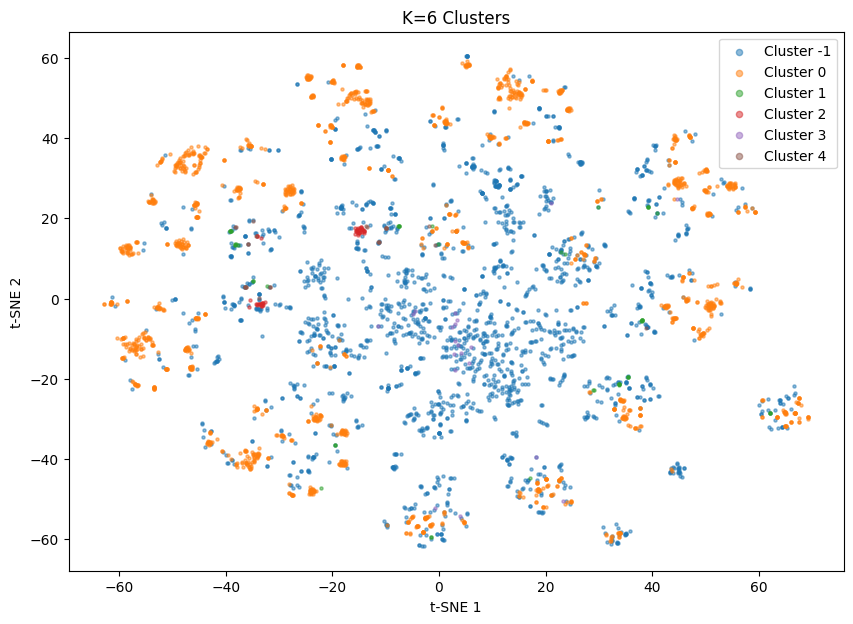

In [425]:

fig = plot_tsne_clusters(tsne_results, clusters_df, cluster_col_prefix='dbscan_cluster_', k_clusters=unique_clusters)

In [426]:
plot_3d_clusters(tsne_df_3d, clusters_df, cluster_col_prefix='dbscan_cluster_', k_clusters=unique_clusters, colors=None, title='3D t-SNE Visualization')


In [427]:
clusters_df[f'dbscan_cluster_{unique_clusters}'].value_counts()

dbscan_cluster_6
-1    1964
 0    1598
 1      51
 2      47
 4      26
 3      20
Name: count, dtype: int64

In [428]:
# Calculate and display the percentage distribution of clusters
cluster_percentages = (clusters_df[f'dbscan_cluster_{unique_clusters}'].value_counts() / len(clusters_df) * 100).round(2)
print("\nCluster Distribution (%):")
print(cluster_percentages)



Cluster Distribution (%):
dbscan_cluster_6
-1    53.00
 0    43.12
 1     1.38
 2     1.27
 4     0.70
 3     0.54
Name: count, dtype: float64


### DBSCAN with less components


In [457]:
n_components = 6

pca = PCA(n_components=n_components)
data_pca_less = pca.fit_transform(rfm_af_scaled_df)

# Step 3: Create a DataFrame with the PCA results
# Convert the reduced data into a DataFrame for easier plotting and analysis
pca_df_less = pd.DataFrame(data_pca_less, columns=[f'PCA{i+1}' for i in range(n_components)])

# Step 5: (Optional) Explained Variance
# Check the explained variance to understand how much information is retained in the 2 components
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Component: {explained_variance}")
print(f"Total Explained Variance: {explained_variance.sum()}")

Explained Variance by Component: [0.09909609 0.06382722 0.05896395 0.05385191 0.05095706 0.03681554]
Total Explained Variance: 0.36351176736444357


In [461]:
# Set DBSCAN parameters
dbscan = DBSCAN(eps=0.5, min_samples=100)  # You might need to tune `eps` and `min_samples`

# Fit DBSCAN model
dbscan_labels = dbscan.fit_predict(data_pca_less)

unique_clusters = np.unique(dbscan_labels).shape[0]

clusters_df[f'dbscan_less_cluster_{unique_clusters}'] = dbscan_labels


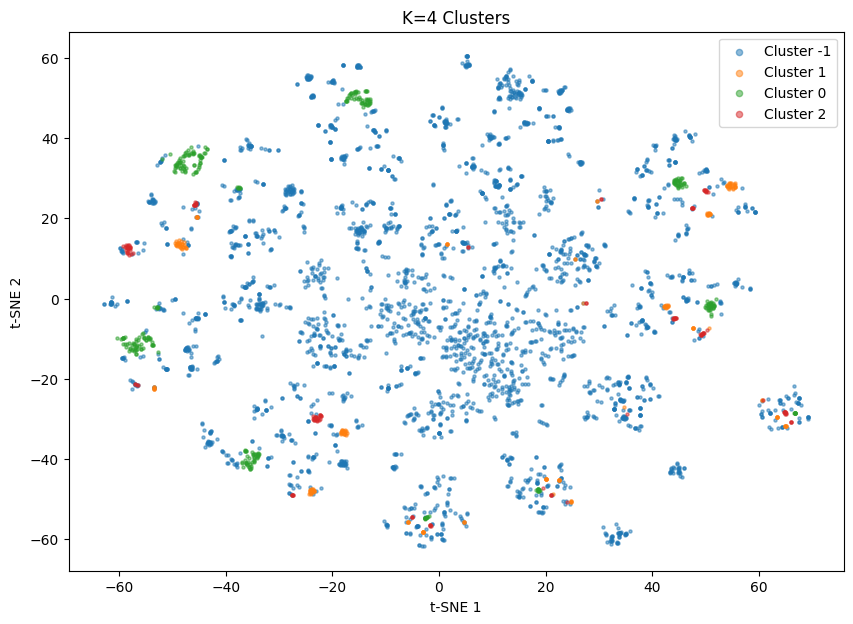

In [462]:
fig = plot_tsne_clusters(tsne_results, clusters_df, cluster_col_prefix='dbscan_less_cluster_', k_clusters=unique_clusters)

In [463]:

plot_3d_clusters(tsne_df_3d, clusters_df, cluster_col_prefix='dbscan_less_cluster_', k_clusters=unique_clusters, colors=None, title='3D t-SNE Visualization')

In [433]:
clusters_df[f'dbscan_less_cluster_{unique_clusters}'].value_counts()


dbscan_less_cluster_6
-1     1498
 6      812
 1      423
 8      259
 12      92
 4       63
 11      46
 9       26
 0       25
 27      23
 43      22
 16      17
 38      17
 45      16
 2       16
 3       16
 13      15
 17      14
 40      14
 35      13
 20      13
 39      13
 54      12
 5       12
 23      11
 36      11
 22      11
 28      10
 18      10
 19      10
 14      10
 7        8
 42       8
 37       8
 24       8
 31       8
 10       8
 50       8
 32       7
 49       7
 48       7
 51       6
 15       6
 30       6
 34       6
 33       6
 46       5
 41       5
 29       5
 26       5
 25       5
 53       5
 21       5
 44       5
 52       5
 47       4
Name: count, dtype: int64

In [434]:

# Calculate and display the percentage distribution of clusters
cluster_percentages = (clusters_df[f'dbscan_less_cluster_{unique_clusters}'].value_counts() / len(clusters_df) * 100).round(2)
print("\nCluster Distribution (%):")
print(cluster_percentages)




Cluster Distribution (%):
dbscan_less_cluster_6
-1     40.42
 6     21.91
 1     11.41
 8      6.99
 12     2.48
 4      1.70
 11     1.24
 9      0.70
 0      0.67
 27     0.62
 43     0.59
 16     0.46
 38     0.46
 45     0.43
 2      0.43
 3      0.43
 13     0.40
 17     0.38
 40     0.38
 35     0.35
 20     0.35
 39     0.35
 54     0.32
 5      0.32
 23     0.30
 36     0.30
 22     0.30
 28     0.27
 18     0.27
 19     0.27
 14     0.27
 7      0.22
 42     0.22
 37     0.22
 24     0.22
 31     0.22
 10     0.22
 50     0.22
 32     0.19
 49     0.19
 48     0.19
 51     0.16
 15     0.16
 30     0.16
 34     0.16
 33     0.16
 46     0.13
 41     0.13
 29     0.13
 26     0.13
 25     0.13
 53     0.13
 21     0.13
 44     0.13
 52     0.13
 47     0.11
Name: count, dtype: float64


In [435]:
sales.customer_id.nunique()

3706

In [436]:
len(clusters_df)


3706

In [437]:
clusters_df['pca_cluster_5'].value_counts()


pca_cluster_5
0    1452
3     946
2     670
1     623
4      15
Name: count, dtype: int64

### Cluster Statistics


In [441]:
def calculate_cluster_stats(data_df, cluster_column, feature_cols=None, percentiles=[0.25, 0.5, 0.75]):
    """
    Calculate detailed statistics for each cluster with side-by-side comparison.
    
    Parameters:
    -----------
    data_df : pandas.DataFrame
        DataFrame containing the features and cluster assignments
    cluster_column : str
        Name of the column containing cluster assignments
    feature_cols : list, optional
        List of feature columns to analyze. If None, uses all numeric columns except cluster columns
    percentiles : list, optional
        List of percentiles to calculate, default [0.25, 0.5, 0.75]
        
    Returns:
    --------
    dict
        Dictionary containing DataFrames for each statistic type:
        - 'means': Mean values for each feature across clusters
        - 'std': Standard deviations for each feature across clusters
        - 'min': Minimum values for each feature across clusters
        - 'max': Maximum values for each feature across clusters
        - 'percentiles': Percentile values for each feature across clusters
        - 'sizes': Cluster sizes and percentages
    """
    # If no feature columns specified, use all numeric columns except cluster columns
    if feature_cols is None:
        feature_cols = data_df.select_dtypes(include=['float64', 'int64']).columns
        feature_cols = [col for col in feature_cols if 'cluster' not in col.lower()]
    
    # Calculate statistics
    means = data_df.groupby(cluster_column)[feature_cols].mean().round(2)
    stds = data_df.groupby(cluster_column)[feature_cols].std().round(2)
    mins = data_df.groupby(cluster_column)[feature_cols].min().round(2)
    maxs = data_df.groupby(cluster_column)[feature_cols].max().round(2)
    
    # Calculate percentiles
    percentile_stats = {}
    for p in percentiles:
        percentile_stats[f'{int(p*100)}th'] = data_df.groupby(cluster_column)[feature_cols].quantile(p).round(2)
    
    # Calculate cluster sizes and percentages
    sizes = data_df[cluster_column].value_counts()
    size_percentages = (sizes / len(data_df) * 100).round(2)
    size_stats = pd.DataFrame({
        'count': sizes,
        'percentage': size_percentages
    })
    # Get cluster order by size (largest to smallest)
    cluster_order = size_stats.index.tolist()
    
    # Sort all statistics DataFrames by cluster size and add size info as first column
    means = means.reindex(cluster_order)
    means.insert(0, 'cluster_size', size_stats['count'])
    
    stds = stds.reindex(cluster_order)
    stds.insert(0, 'cluster_size', size_stats['count'])
    
    mins = mins.reindex(cluster_order)
    mins.insert(0, 'cluster_size', size_stats['count'])
    
    maxs = maxs.reindex(cluster_order)
    maxs.insert(0, 'cluster_size', size_stats['count'])
    # Sort percentile stats
    for p in percentile_stats:
        percentile_stats[p] = percentile_stats[p].reindex(cluster_order)
    # Create comparison tables for each statistic
    stats = {
        'means': means,
        'std': stds,
        'min': mins,
        'max': maxs,
        'percentiles': percentile_stats,
        'sizes': size_stats
    }
    
    return stats

# # Example usage:
# stats = calculate_cluster_stats(rfm_original, 'cluster')



In [442]:
clusters_df.columns


Index(['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5',
       'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9', 'cluster_10',
       'cluster_11', 'cluster_12', 'cluster_13', 'cluster_14', 'cluster_15',
       'cluster_16', 'cluster_17', 'cluster_18', 'cluster_19', 'cluster_20',
       'cluster_21', 'cluster_22', 'cluster_23', 'cluster_24', 'cluster_25',
       'cluster_26', 'cluster_27', 'cluster_28', 'cluster_29', 'cluster_30',
       'cluster_31', 'cluster_32', 'cluster_33', 'cluster_34', 'cluster_35',
       'cluster_36', 'cluster_37', 'cluster_38', 'cluster_39',
       'tsne_cluster_1', 'tsne_cluster_2', 'tsne_cluster_3', 'tsne_cluster_4',
       'tsne_cluster_5', 'tsne_cluster_6', 'tsne_cluster_7', 'tsne_cluster_8',
       'tsne_cluster_9', 'pca_cluster_1', 'pca_cluster_2', 'pca_cluster_3',
       'pca_cluster_4', 'pca_cluster_5', 'pca_cluster_6', 'pca_cluster_7',
       'pca_cluster_8', 'pca_cluster_9', 'dbscan_cluster_6',
       'dbscan_less_cluster_6'],
    

In [443]:
rfm_cluster= rfm_af.merge(clusters_df, left_on='customer_id', right_on='customer_id', how='left')

rfm_cluster


,frequency,monetary,quantity,discount_total,market_name_International_rate,market_name_United States_rate,month_1_rate,month_2_rate,month_3_rate,month_4_rate,month_5_rate,month_6_rate,month_7_rate,month_8_rate,month_9_rate,month_10_rate,month_11_rate,month_12_rate,is_discounted_False_rate,is_discounted_True_rate,product_type_adj_Book Prints_rate,product_type_adj_Classique_rate,product_type_adj_Favorite Larger_rate,product_type_adj_Gift Collection_rate,product_type_adj_Gift Collection Large_rate,product_type_adj_Grand_rate,product_type_adj_Handwritten_rate,product_type_adj_Mini_rate,product_type_adj_Series_rate,frame_color_Black_rate,frame_color_Cream_rate,frame_color_White_rate,frame_color_Wood_rate,referring_channel_grouped_direct_rate,referring_channel_grouped_facebook_rate,referring_channel_grouped_google_rate,referring_channel_grouped_instagram_rate,referring_channel_grouped_other_rate,referring_channel_grouped_smartrmail_rate,is_returning,discount_percentage,net_quantity,unit_price,longitude,latitude,discount_per_item,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,cluster_18,cluster_19,cluster_20,cluster_21,cluster_22,cluster_23,cluster_24,cluster_25,cluster_26,cluster_27,cluster_28,cluster_29,cluster_30,cluster_31,cluster_32,cluster_33,cluster_34,cluster_35,cluster_36,cluster_37,cluster_38,cluster_39,tsne_cluster_1,tsne_cluster_2,tsne_cluster_3,tsne_cluster_4,tsne_cluster_5,tsne_cluster_6,tsne_cluster_7,tsne_cluster_8,tsne_cluster_9,pca_cluster_1,pca_cluster_2,pca_cluster_3,pca_cluster_4,pca_cluster_5,pca_cluster_6,pca_cluster_7,pca_cluster_8,pca_cluster_9,dbscan_cluster_6,dbscan_less_cluster_6
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4567021831,1,289.00,1,0.00,0.0,1.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.00,1.000,0.0,0.0,0.000,1.000000,0.000000,0.0,1.00,0.0,0.000,0.0,0.0,0.0,0.000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,1.000,0,0.000000,1.0,289.000000,0.568731,51.415739,0.000000,0,0,0,0,4,5,5,6,6,6,10,10,10,10,10,10,10,10,10,10,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,0,1,1,1,3,1,1,1,8,0,0,1,3,3,3,3,4,4,-1,-1
6239237578,1,1007.00,4,0.00,0.0,1.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.00,0.000,1.0,0.0,0.000,1.000000,0.000000,0.0,0.25,0.0,0.750,0.0,0.0,0.0,0.000,0.0,1.000000,0.0,0.000000,0.0,1.0,0.0,0.000,0.0,0.0,0.000,0,0.000000,1.0,251.750000,-89.383761,43.074761,0.000000,0,0,0,0,4,5,5,6,6,6,6,6,6,13,14,14,14,14,14,14,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,0,1,2,1,1,5,5,7,1,0,0,1,3,3,3,3,4,4,-1,-1
6411522516,6,877.70,8,146.50,0.0,1.0,0.0,0.0,0.25,0.250000,0.000000,0.0,0.0,0.25,0.125,0.0,0.0,0.125,0.500000,0.500000,0.0,0.00,0.0,0.875,0.0,0.0,0.0,0.125,0.0,1.000000,0.0,0.000000,0.0,0.5,0.0,0.375,0.0,0.0,0.125,1,12.500000,1.0,109.712500,-73.640685,40.749268,18.312500,0,1,1,1,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,27,27,27,27,27,27,27,27,27,4,4,4,0,1,1,3,4,1,4,1,1,0,0,1,1,1,1,1,1,1,-1,-1
6421963796,3,382.25,3,34.75,0.0,1.0,0.0,0.0,0.00,0.333333,0.666667,0.0,0.0,0.00,0.000,0.0,0.0,0.000,0.666667,0.333333,0.0,0.00,0.0,1.000,0.0,0.0,0.0,0.000,0.0,0.666667,0.0,0.333333,0.0,1.0,0.0,0.000,0.0,0.0,0.000,1,8.333333,1.0,127.416667,-81.599589,29.652377,11.583333,0,1,1,1,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,4,3,3,3,21,21,4,4,4,4,4,4,4,4,4,31,31,31,0,1,1,3,3,4,3,5,5,0,0,1,1,1,1,1,1,1,-1,-1
6527939348,1,139.00,1,0.00,0.0,1.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.00,1.000,0.0,0.0,0.000,1.000000,0.000000,0.0,0.00,0.0,1.000,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,1.000000,0.0,1.0,0.0,0.000,0.0,0.0,0.000,0,0.000000,1.0,139.000000,-117.084195,32.640054,0.000000,0,0,2,2,4,5,5,6,6,6,6,6,6,13,13,13,13,13,13,13,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,0,1,1,1,1,1,1,1,8,0,0,1,3,3,3,3,4,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [444]:
rfm_cluster['pca_cluster_5'].value_counts()

pca_cluster_5
0    1452
3     946
2     670
1     623
4      15
Name: count, dtype: int64

In [445]:
cluster_stats= calculate_cluster_stats(rfm_cluster, 'pca_cluster_5')

In [446]:
cluster_stats['means']

,cluster_size,frequency,monetary,quantity,discount_total,market_name_International_rate,market_name_United States_rate,month_1_rate,month_2_rate,month_3_rate,month_4_rate,month_5_rate,month_6_rate,month_7_rate,month_8_rate,month_9_rate,month_10_rate,month_11_rate,month_12_rate,is_discounted_False_rate,is_discounted_True_rate,product_type_adj_Book Prints_rate,product_type_adj_Classique_rate,product_type_adj_Favorite Larger_rate,product_type_adj_Gift Collection_rate,product_type_adj_Gift Collection Large_rate,product_type_adj_Grand_rate,product_type_adj_Handwritten_rate,product_type_adj_Mini_rate,product_type_adj_Series_rate,frame_color_Black_rate,frame_color_Cream_rate,frame_color_White_rate,frame_color_Wood_rate,referring_channel_grouped_direct_rate,referring_channel_grouped_facebook_rate,referring_channel_grouped_google_rate,referring_channel_grouped_instagram_rate,referring_channel_grouped_other_rate,referring_channel_grouped_smartrmail_rate,is_returning,discount_percentage,net_quantity,unit_price,longitude,latitude,discount_per_item
pca_cluster_5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1452,1.04,69.70,1.32,0.02,0.09,0.91,0.13,0.12,0.17,0.07,0.07,0.02,0.02,0.03,0.03,0.03,0.13,0.17,1.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.97,0.00,0.67,0.02,0.11,0.19,0.17,0.58,0.09,0.11,0.02,0.02,0.04,0.02,1.02,52.65,-78.83,39.21,0.01
3,946,1.06,178.01,1.32,0.13,0.27,0.73,0.09,0.07,0.10,0.08,0.13,0.07,0.04,0.04,0.06,0.05,0.14,0.13,1.00,0.00,0.04,0.02,0.01,0.76,0.01,0.00,0.02,0.14,0.00,0.81,0.07,0.05,0.01,0.40,0.15,0.23,0.11,0.07,0.03,0.06,0.04,1.01,142.02,-56.67,38.19,0.05
2,670,1.14,160.74,1.86,38.68,0.19,0.81,0.17,0.22,0.07,0.08,0.06,0.07,0.06,0.02,0.04,0.03,0.04,0.14,0.02,0.98,0.00,0.01,0.01,0.39,0.00,0.00,0.02,0.56,0.01,0.75,0.05,0.08,0.09,0.36,0.29,0.13,0.07,0.07,0.08,0.13,15.67,1.04,93.29,-64.40,38.42,20.99
1,623,2.84,412.42,4.57,26.46,0.09,0.91,0.12,0.07,0.10,0.11,0.08,0.05,0.05,0.03,0.05,0.06,0.14,0.14,0.78,0.22,0.01,0.01,0.00,0.33,0.00,0.00,0.05,0.60,0.00,0.71,0.06,0.08,0.09,0.29,0.22,0.15,0.03,0.07,0.23,0.97,3.72,1.08,91.55,-80.11,39.07,5.00
4,15,1.40,7496.17,2.13,3718.32,0.40,0.60,0.13,0.07,0.07,0.27,0.07,0.00,0.07,0.07,0.07,0.01,0.11,0.07,0.25,0.75,0.00,0.00,0.00,0.04,0.00,0.21,0.00,0.02,0.73,0.73,0.20,0.07,0.00,0.62,0.00,0.13,0.13,0.00,0.12,0.13,30.99,1.00,4947.32,-35.07,40.39,2742.53


In [447]:
cluster_stats['sizes']


,count,percentage
pca_cluster_5,,
0,1452,39.18
3,946,25.53
2,670,18.08
1,623,16.81
4,15,0.40


In [448]:
cluster_stats['means'].to_csv('pca_cluster_5_means.csv')


In [449]:
sales_cluster = sales.merge(clusters_df[['pca_cluster_5']], left_on='customer_id', right_on='customer_id', how='left')

sales_cluster.rename(columns={'pca_cluster_5': 'cluster'}, inplace=True)


In [450]:
sales_cluster.cluster.value_counts()


cluster
1    2634
0    1875
3    1236
2    1207
4      32
Name: count, dtype: int64

In [451]:
sales_cluster.groupby('cluster')['customer_id'].nunique()



cluster
0    1452
1     623
2     670
3     946
4      15
Name: customer_id, dtype: int64

In [452]:
def plot_daily_sales_by_cluster(sales_cluster, exclude_clusters=[]):
    """
    Plots daily sales by customer cluster.

    Parameters:
    sales_cluster (DataFrame): DataFrame containing sales data with a 'cluster' column.
    """
    daily_sales_by_cluster = sales_cluster.groupby(['day', 'cluster'], as_index=False)['net_sales'].sum()

    # Create a line plot
    plt.figure(figsize=(12, 6))

    # Plot each cluster
    for cluster in daily_sales_by_cluster.cluster.unique():
        if cluster not in exclude_clusters:
            cluster_data = daily_sales_by_cluster[daily_sales_by_cluster.cluster == cluster]
            plt.plot(cluster_data.day, cluster_data.net_sales, label=f'Cluster {cluster}')

    plt.title('Daily Sales by Customer Cluster')
    plt.xlabel('Date')
    plt.ylabel('Total Sales ($)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    plt.show()
    
    return daily_sales_by_cluster


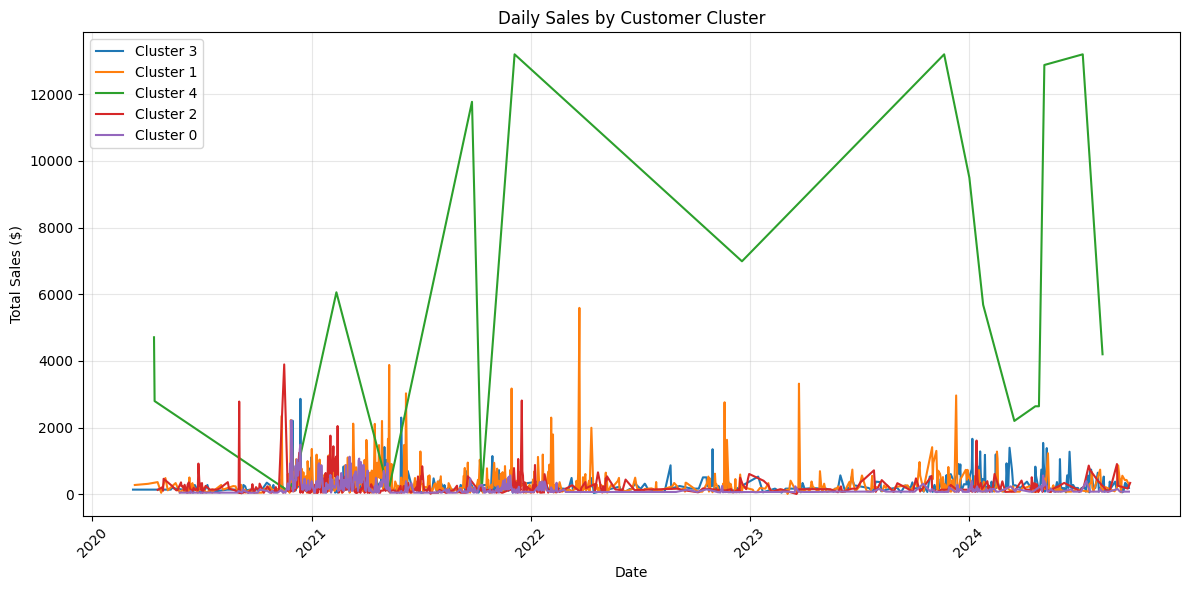

cluster
1    722
3    562
0    482
2    410
4     20
Name: count, dtype: int64

In [468]:
daily_sales_by_cluster = plot_daily_sales_by_cluster(
    sales_cluster,
    # exclude_clusters=[3]
)   

daily_sales_by_cluster.cluster.value_counts()


In [465]:
cluster_descriptions = {
    0: "Low-Value Domestic Buyers",
    1: "Frequent High-Value Shoppers",
    2: "Discount Enthusiasts",
    3: "Moderate Spend Explorers",
    4: "Luxury Shoppers"
}

In [466]:
sales_cluster['cluster_name'] = sales_cluster['cluster'].map(cluster_descriptions)

sales_cluster


,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,api_client_title,shipping_city,market_name,cancelled,financial_status,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,total_sales,discounts,net_quantity,ordered_item_quantity,gross_sales,net_sales,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,is_discounted,latitude,longitude,product_type_adj,frame_color,referring_channel_grouped,discount_per_item,cluster,cluster_name
0,2020-03-09,2051807182986,Denver,3071019712650,6306587911,139.0,Jazz Ensemble,Gift Collection,Online Store,Denver,United States,No,paid,Colorado,United States,First-time,2020-03,2020-01,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,9,139.00,0.0,0.00,False,39.739236,-104.984862,Gift Collection,Black,google,0.00,3,Moderate Spend Explorers
1,2020-03-12,2062875426954,Mineola,6411522516,4612033708170,139.0,Marilyn Monroe,Gift Collection,Online Store,Mineola,United States,No,partially_refunded,New York,United States,Returning,2017-06,2017-04,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,12,139.00,0.0,0.00,False,40.749268,-73.640685,Gift Collection,Black,google,0.00,1,Frequent High-Value Shoppers
2,2020-03-12,2062875426954,Mineola,6411522516,4600557273226,139.0,New York Jazz,Gift Collection,Online Store,Mineola,United States,No,partially_refunded,New York,United States,Returning,2017-06,2017-04,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,12,139.00,0.0,0.00,False,40.749268,-73.640685,Gift Collection,Black,google,0.00,1,Frequent High-Value Shoppers
3,2020-04-03,2115155034250,Mineola,6411522516,4612062969994,139.0,Seated Nude,Gift Collection,Online Store,Mineola,United States,No,paid,New York,United States,Returning,2017-06,2017-04,NaN,NaN,direct,direct,NaN,NaN,104.25,34.75,1,1,139.0,104.25,1,104.25,2020,4,3,104.25,25.0,0.25,True,40.749268,-73.640685,Gift Collection,Black,direct,34.75,1,Frequent High-Value Shoppers
4,2020-04-03,2115155034250,Mineola,6411522516,4605089349770,139.0,Child on Beach,Gift Collection,Online Store,Mineola,United States,No,paid,New York,United States,Returning,2017-06,2017-04,NaN,NaN,direct,direct,NaN,NaN,104.25,34.75,1,1,139.0,104.25,1,104.25,2020,4,3,104.25,25.0,0.25,True,40.749268,-73.640685,Gift Collection,Black,direct,34.75,1,Frequent High-Value Shoppers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,2024-09-24,5971196674278,Ashburn,8290356658406,4806031704202,79.0,Soar!,Mini,Online Store,Minoa,United States,No,paid,Virginia,United States,First-time,2024-09,2024-07,https://www.jeanpierreweill.com/,www.jeanpierreweill.com,direct,direct,NaN,NaN,79.00,0.00,1,1,79.0,79.00,1,79.00,2024,9,24,79.00,0.0,0.00,False,39.030019,-77.469646,Mini,Black,direct,0.00,0,Low-Value Domestic Buyers
6980,2024-09-24,5971497451750,Denver,7524697374950,7030027649179,289.0,Limitless,Classique,Online Store,Denver,United States,No,paid,Colorado,United States,Returning,2023-11,2023-10,https://www.jeanpierreweill.com/collections/cl...,www.jeanpierreweill.com,direct,direct,NaN,NaN,289.00,0.00,1,1,289.0,289.00,1,289.00,2024,9,24,289.00,0.0,0.00,False,39.739236,-104.984862,Classique,Black,direct,0.00,1,Frequent High-Value Shoppers
6981,2024-09-24,5971556303078,Glebe,6370217033958,7766198321382,189.0,Birthday Celebration,Gift Collection,Online Store,Glebe,International,No,paid,New South Wales,Australia,Returning,2022-07,2022-07,https://www.jeanpierreweill.com/cart,www.jeanpierreweill.com,direct,direct,NaN,NaN,189.00,0.00,1,1,189.0,189.00,1,189.0

## Cluster Analysis and Group Naming

### Cluster 0: "Low-Value Domestic Buyers"

- **Size**: 1,452 customers
- **Characteristics**:
  - Low monetary value
  - Low frequency
  - Small quantity per order
  - Low discount utilization
  - Mostly from the United States (91%)
- **Summary**: This group represents customers making low-value purchases at low frequency, primarily in the domestic market.

### Cluster 1: "Frequent High-Value Shoppers"

- **Size**: 623 customers
- **Characteristics**:
  - Highest frequency (2.84)
  - Relatively high monetary value per order
  - Higher quantities
  - High percentage (97%) of returning customers
- **Summary**: These are loyal, high-value customers who make frequent purchases, often buying multiple items. They are key to retaining sales stability.

### Cluster 2: "Discount Enthusiasts"

- **Size**: 670 customers
- **Characteristics**:
  - Moderate frequency
  - Moderate monetary value
  - Significant discount utilization rate (average 15.67%)
  - Buy in slightly larger quantities
- **Summary**: These customers tend to buy more if discounts are offered, making them ideal targets for promotional campaigns.

### Cluster 3: "Moderate Spend Explorers"

- **Size**: 946 customers
- **Characteristics**:
  - Low purchase frequency
  - Moderate spend per order
  - Relatively lower quantities
  - More international representation (27%)
- **Summary**: These customers are somewhat price-sensitive, with moderate interest in spending. They could be encouraged to buy more with well-placed offers.

### Cluster 4: "Luxury Shoppers"

- **Size**: 15 customers
- **Characteristics**:
  - Extremely high monetary value per order ($7,496.17)
  - High discount utilization
  - Very high average unit prices
- **Summary**: These customers buy luxury products and respond well to discounts. They make fewer purchases but have significant monetary value. They are ideal for high-end product promotions.

In [471]:
sales_cluster.referring_channel_grouped.unique()



array(['google', 'direct', 'smartrmail', 'facebook', 'other', 'instagram'],
      dtype=object)


## Channel Preferences Analysis

### Cluster 0: "Low-Value Domestic Buyers"
- **Top Channel**: Facebook (58%) is the dominant referring channel for this group
- **Other Channels**:
  - Direct (17%)
  - Instagram (11%)
- **Note**: Facebook clearly leads in this segment

### Cluster 1: "Frequent High-Value Shoppers"
- **Top Channel**: Direct (29%) is the most common referring channel
- **Other Channels**:
  - Facebook (22%)
  - SmartrMail (23%)
  - Google (15%)
- **Note**: Shows a mix of organic and promotional referrals

### Cluster 2: "Discount Enthusiasts"
- **Top Channel**: Direct (36%) leads as the primary channel
- **Other Channels**:
  - Facebook (29%)
  - SmartrMail (8%)
- **Note**: Shows strong preference for direct engagement

### Cluster 3: "Moderate Spend Explorers"
- **Top Channel**: Direct (40%) is the leading channel
- **Other Channels**:
  - Google (23%)
  - Facebook (15%)
  - Instagram (11%)
- **Note**: Shows diverse entry points for this group

### Cluster 4: "Luxury Shoppers"
- **Top Channel**: Direct (62%) is overwhelmingly the primary channel
- **Other Channels**:
  - Google (13%)
  - Instagram (13%)
- **Note**: High reliance on direct access suggests intentional shopping behavior

## Key Findings
1. **Direct Traffic**:
   - Notably high across all clusters
   - Particularly strong for "Luxury Shoppers" and "Frequent High-Value Shoppers"
   - Indicates brand loyalty or familiarity

2. **Facebook**:
   - Most popular with "Low-Value Domestic Buyers"
   - Becomes less significant for higher-value clusters

3. **SmartrMail**:
   - Predominantly used by "Frequent High-Value Shoppers"
   - Suggests email campaigns are effective for this group

In [473]:
sales_cluster.product_type_adj.unique()


array(['Gift Collection', 'Series', 'Mini', 'Book Prints', 'Classique',
       'Handwritten', 'Grand', 'Favorite Larger', 'Gift Collection Large'],
      dtype=object)

## Product Preferences Analysis

### Cluster 0: "Low-Value Domestic Buyers"
- **Top Product**: Mini products (97%)
  - Aligns with low average spend
- **Other Products**:
  - Minimal Gift Collection purchases
  - Minimal Handwritten items
- **Summary**: Strong preference for affordable items, particularly Mini products (avg. $51.45)

### Cluster 1: "Frequent High-Value Shoppers"
- **Top Products**:
  - Mini products (60%)
  - Gift Collection (33%)
- **Other Products**:
  - Handwritten items (5%)
  - Small percentage of Book Prints
  - Small percentage of Classique products
- **Summary**: Diverse range of purchases, favoring smaller to mid-tier products despite frequent buying patterns

### Cluster 2: "Discount Enthusiasts"
- **Top Products**:
  - Gift Collection (39%)
  - Mini products (56%)
- **Other Products**:
  - Favorite Larger (1%)
  - Handwritten items (2%)
- **Summary**: Focus on mid-tier products with good discount potential

### Cluster 3: "Moderate Spend Explorers"
- **Top Product**: Gift Collection (76%)
- **Other Products**:
  - Mini products (14%)
  - Gift Collection Large (1%)
  - Book Prints (4%)
- **Summary**: Strong preference for giftable, mid-range items, suggesting occasion-driven purchases

### Cluster 4: "Luxury Shoppers"
- **Top Products**:
  - Series products (73%) - avg. $2,576.09
  - Grand products (21%) - avg. $12,195.00
- **Other Products**:
  - Mini products (2%)
- **Summary**: Clear preference for premium, high-value items

## Key Findings
1. **Price Point Alignment**:
   - Lower-value clusters gravitate to Mini products ($51.45)
   - Mid-tier clusters prefer Gift Collection ($131.90)
   - Luxury cluster focuses on Series ($2,576.09) and Grand ($12,195.00)

2. **Product Mix**:
   - Most clusters show some product diversity
   - Higher-value clusters tend toward premium products
   - Lower-value clusters stick to affordable options

3. **Purchase Patterns**:
   - Clear correlation between cluster value and product price points
   - Gift Collection serves as a middle-ground product across multiple clusters
   - Luxury items are almost exclusively purchased by Cluster 4

In [476]:
sales_cluster.groupby('product_type_adj')['unit_price'].mean().round(2)


product_type_adj
Book Prints                 58.23
Classique                  427.49
Favorite Larger            414.39
Gift Collection            131.90
Gift Collection Large      690.90
Grand                    12195.00
Handwritten                  9.73
Mini                        51.45
Series                    2576.09
Name: unit_price, dtype: float64

In [478]:
sales_cluster.to_csv('datasets/for_dashboard/sales_clustered.csv', index=False)

In [479]:
sales_cluster

,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,api_client_title,shipping_city,market_name,cancelled,financial_status,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,total_sales,discounts,net_quantity,ordered_item_quantity,gross_sales,net_sales,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,is_discounted,latitude,longitude,product_type_adj,frame_color,referring_channel_grouped,discount_per_item,cluster,cluster_name
0,2020-03-09,2051807182986,Denver,3071019712650,6306587911,139.0,Jazz Ensemble,Gift Collection,Online Store,Denver,United States,No,paid,Colorado,United States,First-time,2020-03,2020-01,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,9,139.00,0.0,0.00,False,39.739236,-104.984862,Gift Collection,Black,google,0.00,3,Moderate Spend Explorers
1,2020-03-12,2062875426954,Mineola,6411522516,4612033708170,139.0,Marilyn Monroe,Gift Collection,Online Store,Mineola,United States,No,partially_refunded,New York,United States,Returning,2017-06,2017-04,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,12,139.00,0.0,0.00,False,40.749268,-73.640685,Gift Collection,Black,google,0.00,1,Frequent High-Value Shoppers
2,2020-03-12,2062875426954,Mineola,6411522516,4600557273226,139.0,New York Jazz,Gift Collection,Online Store,Mineola,United States,No,partially_refunded,New York,United States,Returning,2017-06,2017-04,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,12,139.00,0.0,0.00,False,40.749268,-73.640685,Gift Collection,Black,google,0.00,1,Frequent High-Value Shoppers
3,2020-04-03,2115155034250,Mineola,6411522516,4612062969994,139.0,Seated Nude,Gift Collection,Online Store,Mineola,United States,No,paid,New York,United States,Returning,2017-06,2017-04,NaN,NaN,direct,direct,NaN,NaN,104.25,34.75,1,1,139.0,104.25,1,104.25,2020,4,3,104.25,25.0,0.25,True,40.749268,-73.640685,Gift Collection,Black,direct,34.75,1,Frequent High-Value Shoppers
4,2020-04-03,2115155034250,Mineola,6411522516,4605089349770,139.0,Child on Beach,Gift Collection,Online Store,Mineola,United States,No,paid,New York,United States,Returning,2017-06,2017-04,NaN,NaN,direct,direct,NaN,NaN,104.25,34.75,1,1,139.0,104.25,1,104.25,2020,4,3,104.25,25.0,0.25,True,40.749268,-73.640685,Gift Collection,Black,direct,34.75,1,Frequent High-Value Shoppers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,2024-09-24,5971196674278,Ashburn,8290356658406,4806031704202,79.0,Soar!,Mini,Online Store,Minoa,United States,No,paid,Virginia,United States,First-time,2024-09,2024-07,https://www.jeanpierreweill.com/,www.jeanpierreweill.com,direct,direct,NaN,NaN,79.00,0.00,1,1,79.0,79.00,1,79.00,2024,9,24,79.00,0.0,0.00,False,39.030019,-77.469646,Mini,Black,direct,0.00,0,Low-Value Domestic Buyers
6980,2024-09-24,5971497451750,Denver,7524697374950,7030027649179,289.0,Limitless,Classique,Online Store,Denver,United States,No,paid,Colorado,United States,Returning,2023-11,2023-10,https://www.jeanpierreweill.com/collections/cl...,www.jeanpierreweill.com,direct,direct,NaN,NaN,289.00,0.00,1,1,289.0,289.00,1,289.00,2024,9,24,289.00,0.0,0.00,False,39.739236,-104.984862,Classique,Black,direct,0.00,1,Frequent High-Value Shoppers
6981,2024-09-24,5971556303078,Glebe,6370217033958,7766198321382,189.0,Birthday Celebration,Gift Collection,Online Store,Glebe,International,No,paid,New South Wales,Australia,Returning,2022-07,2022-07,https://www.jeanpierreweill.com/cart,www.jeanpierreweill.com,direct,direct,NaN,NaN,189.00,0.00,1,1,189.0,189.00,1,189.0

In [483]:
# Filter sales for February 7, 2020
sales_feb7 = sales_cluster[sales_cluster['day'] == '2020-02-07']
display(sales_feb7)


,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,api_client_title,shipping_city,market_name,cancelled,financial_status,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,total_sales,discounts,net_quantity,ordered_item_quantity,gross_sales,net_sales,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,is_discounted,latitude,longitude,product_type_adj,frame_color,referring_channel_grouped,discount_per_item,cluster,cluster_name


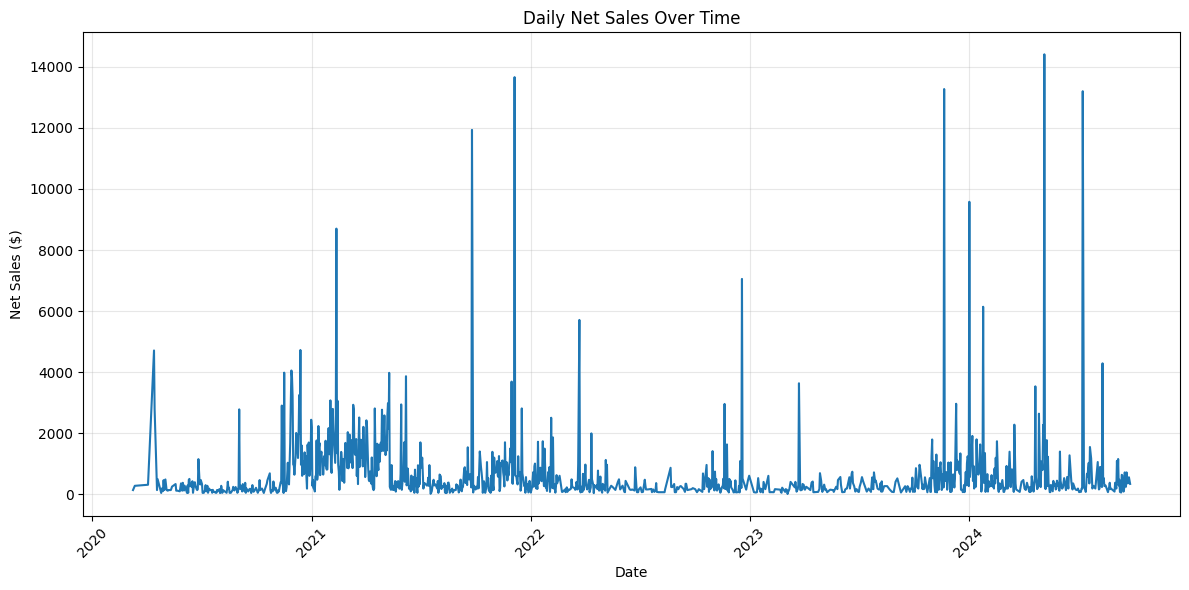

In [482]:
# Plot daily net sales over time
plt.figure(figsize=(12,6))

# Calculate daily net sales
daily_sales = sales_cluster.groupby('day')['net_sales'].sum().reset_index()

# Create the line plot
plt.plot(daily_sales['day'], daily_sales['net_sales'])

# Customize the plot
plt.title('Daily Net Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Net Sales ($)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()
